In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.cm as cm

### at first create some random points in 2D

In [147]:
number_points = 3
dimensions = 2

points = np.random.rand(number_points, dimensions)
points = np.array([[0.5,1],[1, 0.5], [0.5,0.5]])

In [148]:
# build the Delaunay triangles according to the input points
tri = Delaunay(points)

In [378]:
# create random points inside the Delaunay grid
test_points = np.random.rand(4,2)
#test_points = np.array([[0.6, 0.8], [0.8, 0.8], [0.7, 0.7]])
test_points

array([[0.28584713, 0.29322898],
       [0.5074915 , 0.61132004],
       [0.12245863, 0.64782153],
       [0.95650447, 0.67244934]])

In [222]:
# index of the triangle in which the test_points falls
s = tri.find_simplex(test_points)

In [223]:
# number of triangles
triangles, points_in_tri_counts = np.unique(s, return_counts=True)

In [224]:
# get the indexes of the Delaunay points for all the test_points
# each test_point is connected to the points describing the triangle in which this test_point is

v = tri.simplices[s]
v

array([[2, 1, 0],
       [2, 1, 0],
       [2, 1, 0],
       [2, 1, 0]], dtype=int32)

### NOTE 

If a point is outside the trianges (#triangle = -1), then the "indices of the points forming the triangle inside which we find this point" are fake (they are the one for the triangle #triangle-1). The #-1 is the last item in the list of triangles.

the unique lists of points are equal to the number of triangles and there's no value for the "external" space

In [225]:
indexes, counts = np.unique(v, axis=0, return_counts=True)
print("indexes:\n", indexes)
print("points per vertices triplet (non ordered);\n", counts)
print("points per triangle (right and sorted for #triangle);\n", points_in_tri_counts)

indexes:
 [[2 1 0]]
points per vertices triplet (non ordered);
 [4]
points per triangle (right and sorted for #triangle);
 [3 1]


The count of points falling in triangle #0 is the sum of #-1 and #triangle-1 (which is the last item in the list of triangles)

Coords points: [0.72508601 0.57945148]
Triangle: #0,
indexes of points of the simplices: [2 1 0]


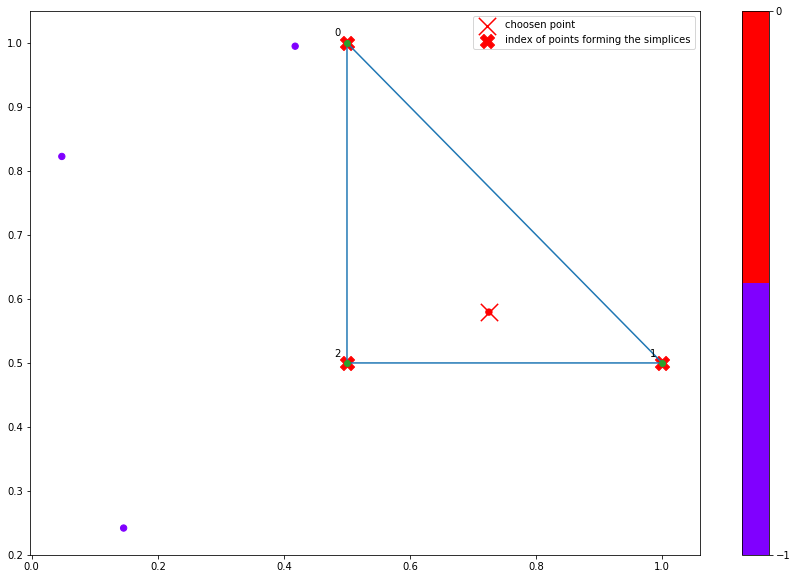

In [262]:
fig = plt.figure(figsize=(15,10))

# plot points and connect them with lines
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')

# label the points of the Delaunay grid
for j, p in enumerate(points):
    plt.text(p[0]-0.01, p[1]+0.01, j, ha='right')

# plot test points according to their 
cmap = cm.get_cmap('rainbow', len(triangles))
this = plt.scatter(test_points[:,0], test_points[:,1], c = s, s = 40, cmap=cmap)
plt.colorbar(ticks=np.arange(np.min(triangles),np.max(triangles)+1))

# choose one test point to get its properties
choose_point = 2

# get the indices of the points forming the simplices in the triangulation 
simplices = tri.simplices[s[choose_point]]
print("Coords points: {0}\nTriangle: #{1},\nindexes of points of the simplices: {2}"
      .format(
          test_points[choose_point], 
          s[choose_point], 
          simplices
      )
     )

plt.scatter(test_points[choose_point][0], 
            test_points[choose_point][1], 
            marker = 'x', 
            s = 300, 
            label = "choosen point", 
            c = "red")

plt.scatter(points[simplices][:,0], 
            points[simplices][:,1], 
            marker = 'X', 
            s = 200, 
            c = 'red', 
            label = 'index of points forming the simplices')


plt.legend()
plt.show()

In [228]:
# Affine transform from x to the barycentric coordinates c.
# T c = x - r
# ==> c = T^-1 (x - r)
# Compute barycentric affine coordinate transformations for given simplices.
# output ndarray of double, shape (nsimplex, ndim+1, ndim)

tri.transform.shape

(1, 3, 2)

If the simplex number for all the test_points is passed, the first dimension will not be the number of simplices but the number of test_points, each of which is associated to a simplex.

In [229]:
m = tri.transform[s]
m.shape

(4, 3, 2)

- every points has the transformation matrix related to the simplex in which it is
- the one for #-1 is included in the triangle #0 (it's the same)

- m has one entry per points but just #triangles different ones


In [231]:
np.unique(tri.transform[s], axis = 0)

array([[[-2. , -2. ],
        [ 2. , -0. ],
        [ 0.5,  1. ]]])

In [234]:
m[0]

array([[-2. , -2. ],
       [ 2. , -0. ],
       [ 0.5,  1. ]])

In [235]:
# inverse of the matrix ``T``
i = 0     # point selected

ndim = m.shape[2]
m[i, :ndim, :ndim]

array([[-2., -2.],
       [ 2., -0.]])

In [236]:
m[i, ndim, :]

array([0.5, 1. ])

## calculate baricentric coordinates
http://mathworld.wolfram.com/BarycentricCoordinates.html

$\rm{coords} = {\matrix{T}}^{-1} (\rm{test\_point} - \rm{vertices}) $

#### Where:

${\matrix{T}}^{-1} = \rm{tri.transform[\#triangle, :ndim, :ndim]}$

$\rm{vertices} = \rm{m[\#triangle, self.\_num\_dimensions, :]}$

In [312]:
s = tri.find_simplex(test_points)
print(s)

[-1 -1  0 -1]


In [353]:
# compute coordinates of point 0 in triangle 0
matrix_vals =  tri.transform[0, :2, :2]    # the 0 is for the triangle
vertices = tri.transform[0, 2, :]

print(matrix_vals.shape)
print(matrix_vals)
print("---------")
print(vertices.shape)
print(vertices)

(2, 2)
[[-2. -2.]
 [ 2. -0.]]
---------
(2,)
[0.5 1. ]


In [356]:
# These are 4 points, each with x and y
test_points.shape

(4, 2)

In [362]:
# we have to transpose them in order to multiply
coords = matrix_vals.dot((test_points - vertices).T)
coords

array([[ 1.25934478,  0.17471243,  0.39092501,  2.22434754],
       [-0.90452029, -0.1643676 ,  0.45017203, -0.70850692]])

In [375]:
# THEN to compute the weights we must transpose the array:
# in this way each row is related to one point for which the sum of
# the weights must be equal to 1
weights = np.c_[coords.T, 1 - coords.T.sum(axis=1)]
weights

array([[ 1.25934478, -0.90452029,  0.64517551],
       [ 0.17471243, -0.1643676 ,  0.98965517],
       [ 0.39092501,  0.45017203,  0.15890296],
       [ 2.22434754, -0.70850692, -0.51584062]])

In [379]:
test_points

array([[0.28584713, 0.29322898],
       [0.5074915 , 0.61132004],
       [0.12245863, 0.64782153],
       [0.95650447, 0.67244934]])

## CHECK!!!

$T \cdot coords$ 

In [359]:
np.linalg.inv(matrix_vals).dot(coords)
#(coords.T).dot(np.linalg.inv(matrix_vals)

array([[-0.45226015, -0.0821838 ,  0.22508601, -0.35425346],
       [-0.17741224, -0.00517241, -0.42054852, -0.75792031]])

(test_points - vertices).T

In [361]:
(test_points - vertices).T

array([[-0.45226015, -0.0821838 ,  0.22508601, -0.35425346],
       [-0.17741224, -0.00517241, -0.42054852, -0.75792031]])

### NOTE:
All these "strange" dimensione, transpose, etc...comes from the way in which the data are stored the numpy arrays. Using pen&paper one can check that all these things are correct